In [1]:
import pandas as pd

In [2]:
import os
os.getcwd()

'/home/wolfgang/git/kaggle/g_research_crypto_forecasting/notebooks'

In [3]:
%%time

pd.options.display.max_columns=100
df = pd.read_csv("../data/processed/train_folds.csv").sort_values(by=["Asset_ID", "timestamp"])
df["datetime"] = pd.to_datetime(df.timestamp, unit="s")
df

CPU times: user 42.3 s, sys: 3.06 s, total: 45.4 s
Wall time: 45.4 s


,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,datetime,test_fold,test_time_window
5480441,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399,2018-01-01 00:01:00,1,-1
6753147,1514764920,0,7.0,8.530000,8.530000,8.514500,8.514500,7.139000e+01,8.520215,-0.015875,2018-01-01 00:02:00,1,-1
3940641,1514764980,0,45.0,8.506500,8.529900,8.484800,8.484800,1.546820e+03,8.501394,-0.015410,2018-01-01 00:03:00,0,-1
1506182,1514765040,0,14.0,8.500900,8.506600,8.474400,8.500900,1.258000e+02,8.479810,-0.012524,2018-01-01 00:04:00,0,-1
6290525,1514765100,0,5.0,8.500700,8.500700,8.456000,8.456000,1.250100e+02,8.458435,-0.005940,2018-01-01 00:05:00,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746317,1623542100,13,190.0,0.068069,0.068154,0.068050,0.068111,1.822400e+06,0.068112,-0.002471,2021-06-12 23:55:00,0,0
1632592,1623542160,13,97.0,0.068137,0.068170,0.068025,0.068088,1.101536e+06,0.068130,-0.001289,2021-06-12 23:56:00,0,0
19359218,1623542220,13,227.0,0.068011,0.068044,0.067909,0.067967,2.378181e+06,0.067978,-0.003800,2021-06-12 23:57:00,4,0
17214757,1623542280,13,103.0,0.067998,0.068083,0.067950,0.068057,1.382896e+06,0.068037,-0.002785,2021-06-12 23:58:00,3,0


In [4]:
spans = df.groupby("test_time_window").agg({
    "datetime": ["min", "max", "count"]
})

spans

datetime                              
                                 min                 max     count
test_time_window                                                  
-1               2018-01-01 00:01:00 2020-03-19 23:58:00  13452870
 0               2021-03-15 00:00:00 2021-06-12 23:59:00   1814276
 1               2020-12-15 00:00:00 2021-03-14 23:59:00   1813903
 2               2020-09-16 00:00:00 2020-12-14 23:59:00   1787119
 3               2020-06-18 00:00:00 2020-09-15 23:59:00   1744538
 4               2020-03-19 23:59:00 2020-06-17 23:59:00   1608988

In [5]:
splits = set(spans[("datetime", "min")][1:]).union(set(spans[("datetime", "max")][1:]))
splits = sorted(list(splits))

splits

[Timestamp('2020-03-19 23:59:00'),
 Timestamp('2020-06-17 23:59:00'),
 Timestamp('2020-06-18 00:00:00'),
 Timestamp('2020-09-15 23:59:00'),
 Timestamp('2020-09-16 00:00:00'),
 Timestamp('2020-12-14 23:59:00'),
 Timestamp('2020-12-15 00:00:00'),
 Timestamp('2021-03-14 23:59:00'),
 Timestamp('2021-03-15 00:00:00'),
 Timestamp('2021-06-12 23:59:00')]

In [6]:
df.groupby("Asset_ID").agg({
    "datetime": ["min", "max", "count"]
})

# >> every test split has all assets

datetime                             
                         min                 max    count
Asset_ID                                                 
0        2018-01-01 00:01:00 2021-06-12 23:59:00  1798698
1        2018-01-01 00:01:00 2021-06-12 23:59:00  1812284
2        2018-01-01 00:01:00 2021-06-12 23:59:00  1809539
3        2018-04-17 09:11:00 2021-06-12 23:59:00  1647869
4        2019-04-12 14:34:00 2021-06-12 23:59:00  1012868
5        2018-01-01 00:01:00 2021-06-12 23:59:00  1811142
6        2018-01-01 00:01:00 2021-06-12 23:59:00  1812202
7        2018-01-01 00:01:00 2021-06-12 23:59:00  1807129
8        2018-05-09 08:07:00 2021-06-12 23:59:00  1448354
9        2018-01-01 00:01:00 2021-06-12 23:59:00  1812032
10       2018-05-10 15:21:00 2021-06-12 23:59:00   526954
11       2018-01-01 00:01:00 2021-06-12 23:59:00  1557305
12       2018-02-16 23:53:00 2021-06-12 23:59:00  1634751
13       2018-02-06 21:37:00 2021-06-12 23:59:00  1730567

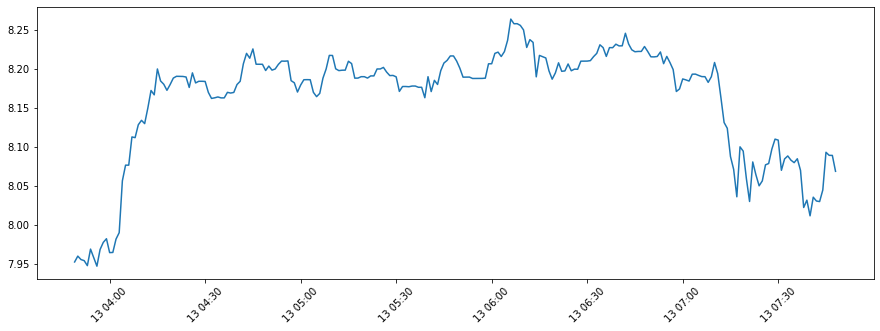

In [7]:
import matplotlib.pyplot as plt

plot_df = df.loc[df["Asset_ID"] == 0,:][100000:100240]

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.tick_params(axis='x', rotation=45)

plt.plot(plot_df.datetime, plot_df.Close)

In [8]:
"""
We observe rather inconsistent foecast quality. Folds 2 and 3 are decent, while 0, 1 and 4 being bad.
Let's see if there is any indication why that is.
"""

"\nWe observe rather inconsistent foecast quality. Folds 2 and 3 are decent, while 0, 1 and 4 being bad.\nLet's see if there is any indication why that is.\n"

In [9]:
df_daily_open = df[(df.datetime.dt.hour == 0) & (df.datetime.dt.minute == 0)]
df_daily_open

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,datetime,test_fold,test_time_window
1052192,1514851200,0,21.0,8.450000,8.463000,8.438100,8.438100,8.008400e+02,8.456293,0.002681,2018-01-02,0,-1
7114461,1514937600,0,24.0,8.715100,8.715100,8.699600,8.699600,3.556700e+03,8.702861,0.004577,2018-01-03,1,-1
2692725,1515024000,0,39.0,9.304000,9.311100,9.265000,9.288000,5.398100e+02,9.296959,-0.012531,2018-01-04,0,-1
1036911,1515110400,0,7.0,9.135000,9.197300,9.083700,9.121500,2.092000e+01,9.193232,NaN,2018-01-05,0,-1
13038163,1515196800,0,23.0,14.890800,15.004500,14.890800,15.004500,1.106910e+03,14.952881,0.008762,2018-01-06,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784154,1623110400,13,909.0,0.071688,0.071903,0.071370,0.071760,1.193353e+07,0.071696,0.002481,2021-06-08,0,0
1708127,1623196800,13,783.0,0.072433,0.072463,0.072030,0.072370,1.073350e+07,0.072321,-0.000869,2021-06-09,0,0
14930051,1623283200,13,719.0,0.075375,0.075507,0.075274,0.075383,5.012705e+06,0.075398,0.000219,2021-06-10,3,0
18021900,1623369600,13,257.0,0.072569,0.072673,0.072508,0.072533,2.033071e+06,0.072590,0.001875,2021-06-11,4,0


In [10]:
asset_details = pd.read_csv("../data/raw/asset_details.csv").set_index("Asset_ID")
asset_names = asset_details.to_dict()["Asset_Name"]

asset_names

{2: 'Bitcoin Cash',
 0: 'Binance Coin',
 1: 'Bitcoin',
 5: 'EOS.IO',
 7: 'Ethereum Classic',
 6: 'Ethereum',
 9: 'Litecoin',
 11: 'Monero',
 13: 'TRON',
 12: 'Stellar',
 3: 'Cardano',
 8: 'IOTA',
 10: 'Maker',
 4: 'Dogecoin'}

0, 8.45
1, 13427.492000000002
2, 2320.8866666666668
3, 0.2437494999999999
4, 0.002787
5, 7.6401
6, 756.2249999999998
7, 29.4995
8, 2.2554
9, 223.74
10, 705.0
11, 340.35
12, 0.49
13, 0.036


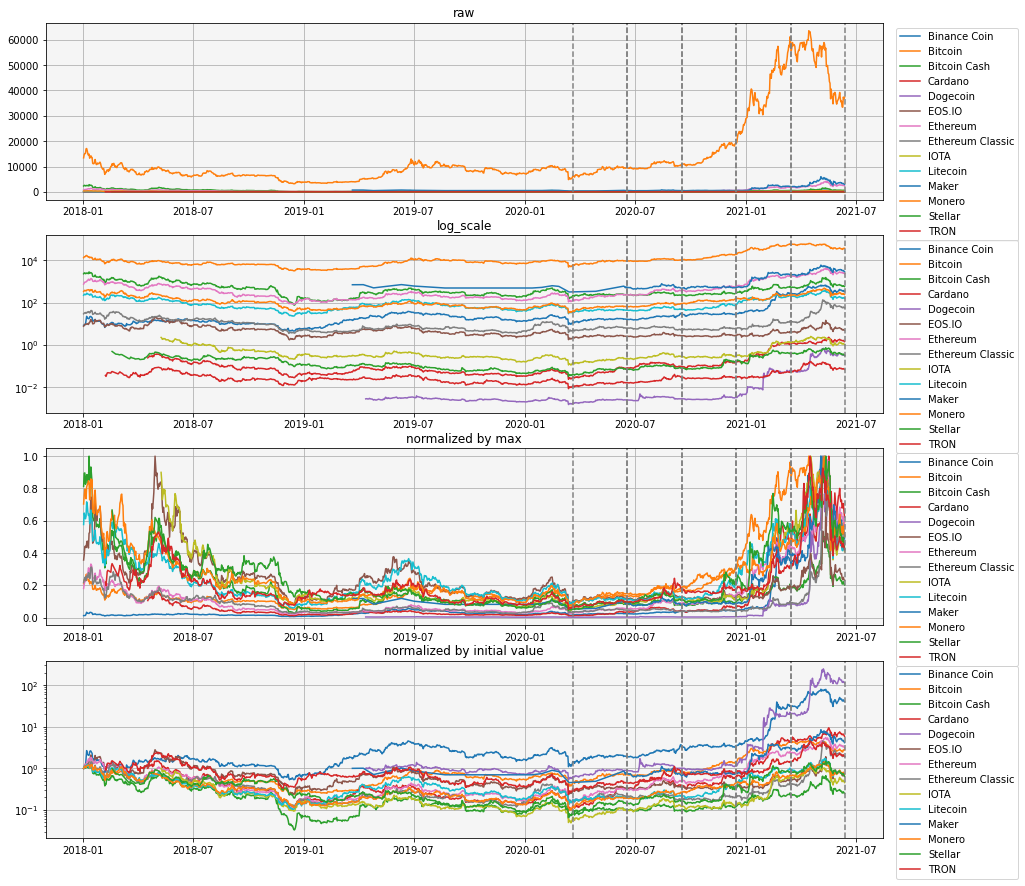

In [11]:
fig, ax = plt.subplots(4, 1, figsize=(15, 15))
for asset_id in df_daily_open.Asset_ID.unique():
    plot_df = df_daily_open[df_daily_open["Asset_ID"] == asset_id]
    ax[0].plot(
        plot_df["datetime"], 
        plot_df["Open"], 
        label=asset_names[asset_id]
    )
    ax[0].set_title("raw")
    ax[1].plot(
        plot_df["datetime"], 
        plot_df["Open"], 
        label=asset_names[asset_id]
    )
    ax[1].set_yscale("log")
    ax[1].set_title("log_scale")
    ax[2].plot(
        plot_df["datetime"], 
        plot_df["Open"] / plot_df["Open"].max(), 
        label=asset_names[asset_id]
    )
    ax[2].set_title("normalized by max")#
    min_datetime = plot_df.datetime.min()
    first_open = plot_df[plot_df["datetime"] == min_datetime]["Open"].values[0]
    print(f"{asset_id}, {first_open}")
    ax[3].plot(
        plot_df["datetime"], 
        plot_df["Open"] / first_open, 
        label=asset_names[asset_id]
    )
    ax[3].set_title("normalized by initial value")
    ax[3].set_yscale("log")

for a in ax:
    for split in splits:
        a.axvline(split, color="gray", linestyle="--")
    a.set_facecolor("whitesmoke")
    a.grid()
    a.legend(bbox_to_anchor=(1.01, 1))